In [2]:
import pandas as pd
import numpy as np
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')


In [5]:
df = pd.read_csv('ADANIPORTS.csv')
df = df.round({'Open': 3, 'High': 3, 'Low': 3, 'Close': 3, 'Adj Close': 3})
features = ['Open', 'High', 'Low', 'Volume']
target = 'Close'
X = df[features]
y = df[target]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,
test_size=0.2, random_state=42)
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_predictions = linear_model.predict(X_test)

In [9]:
ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge_model = Ridge()
ridge_grid = GridSearchCV(ridge_model, ridge_params, scoring='neg_mean_squared_error', cv=5)
ridge_grid.fit(X_train, y_train)
ridge_predictions = ridge_grid.predict(X_test)

Model Evaluation:
Linear Regression MSE: 18.611857230534053
Ridge Regression MSE: 18.598346994855337
Optimal alpha for Ridge: 0.01


Text(0.5, 1.0, 'Linear Regression')

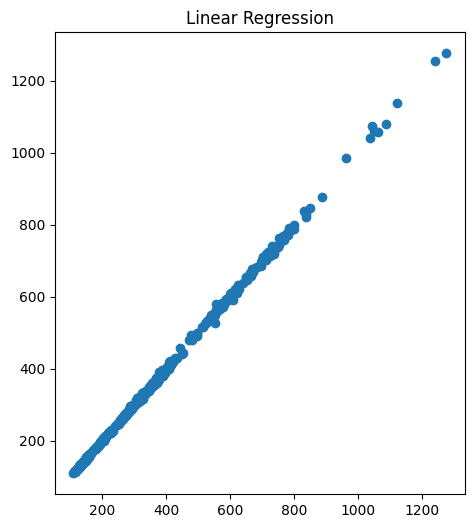

In [10]:
 linear_mse = mean_squared_error(y_test, linear_predictions)
 ridge_mse = mean_squared_error(y_test, ridge_predictions)
 print(f'Model Evaluation:')
 print(f'Linear Regression MSE: {linear_mse}')
 print(f'Ridge Regression MSE: {ridge_mse}')
 print(f'Optimal alpha for Ridge: {ridge_grid.best_params_["alpha"]}')
 plt.figure(figsize=(18, 6))
 plt.subplot(1, 3, 1)
 plt.scatter(y_test, linear_predictions)
 plt.title('Linear Regression')

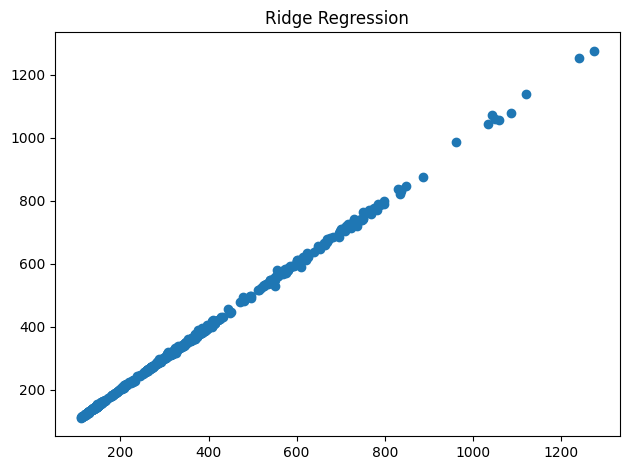

In [11]:
 plt.scatter(y_test, ridge_predictions)
 plt.title('Ridge Regression')
 plt.tight_layout()
